In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import seaborn as sns

In [2]:
data_path=r"C:\Users\DELL\Downloads\minipro\Modified_draft_1.xlsx"

In [3]:
# to read data from excel file
raw_data = pd.read_excel(data_path, skiprows=1, header=3)
raw_data

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,RH,Xylene,BP,AT,RF,WS,WD,Temp,SR,AQI
0,01-01-2017 00:00,02-01-2017 00:00,44.26,75.14,37.47,104.41,85.97,8.01,0.95,21.05,...,77.06,0.7,None,18.88,0.05,1.69,276.47,32.35,106.79,133.0
1,02-01-2017 00:00,03-01-2017 00:00,25.02,50.97,31.85,99.55,78.81,6.83,0.87,19.68,...,68.34,0.47,None,19.65,0.05,1.48,269.67,32.23,133.84,119.0
2,03-01-2017 00:00,04-01-2017 00:00,36.77,72.93,25.9,102.97,75.78,7.83,0.89,21.14,...,61.15,0.38,None,19.52,0.07,1.65,273.88,32.34,116.77,122.0
3,04-01-2017 00:00,05-01-2017 00:00,55.04,90.96,27.3,108.13,79.67,9.27,0.94,21.56,...,64.43,0.37,None,19.06,0.11,1.49,245.88,32.38,116.49,120.0
4,05-01-2017 00:00,06-01-2017 00:00,63.62,105.68,28.92,110.92,82.48,9.88,1.02,21.42,...,68.24,0.52,None,19.13,0.15,1.4,252.73,32.58,117.8,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,27-12-2022 00:00,28-12-2022 00:00,16.97,32.55,22.75,40.05,39.8,5.4,0.88,4.02,...,87.23,0.74,None,21.45,0,0.8,49.7,30.66,60.56,46.0
2187,28-12-2022 00:00,29-12-2022 00:00,32.33,55.19,32.93,53.23,55.1,4.76,0.85,7.64,...,74.74,0.85,None,22.36,0.02,0.48,106.24,30.48,95.57,60.0
2188,29-12-2022 00:00,30-12-2022 00:00,22.38,41.72,20.1,46.77,41.22,5.27,0.86,6.4,...,74.18,0.84,None,22.35,0,0.44,153.03,30.36,95.09,56.0
2189,30-12-2022 00:00,31-12-2022 00:00,35.59,58.4,32.27,54.42,55.18,5.38,0.9,5.13,...,73.03,0.88,None,22.06,0,0.61,151.21,30.08,95.89,67.0


In [4]:
raw_data.isna().sum()

From Date      0
To Date        0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
Benzene        0
Toluene        0
Ozone          0
RH             0
Xylene         0
BP             0
AT             0
RF             0
WS             0
WD             0
Temp           0
SR             0
AQI          240
dtype: int64

In [5]:
#Function to ensure the datatype of data is a valid for the cell
def numeric(row):
    if row is None:
        return None
    try:
        if np.isnan(row):
            return None
        else:
            row = str(row)
            return float(row.replace('x', '').replace('#', '').replace('*', ''))
    except (TypeError, ValueError):
        return None
parameter_list=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3','CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene', 'BP', 'AT','RF', 'WS', 'WD', 'Temp', 'SR','AQI']
for parameter in parameter_list:
    raw_data[parameter]=raw_data[parameter].apply(numeric)

In [6]:
data = raw_data.drop('BP',axis=1)

In [7]:
data.iloc[:, :-1] = data.iloc[:, :-1].fillna(method='ffill')

In [8]:
# data.to_excel('requested_modify_draft1.xlsx', index=False)

In [9]:
#1.normalise data into 0 to 1 2. take distance parameter 3. choose a distance threshold 4.compare with min dista

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Define columns to normalize
columns_to_normalize = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Benzene', 
                        'Toluene', 'Ozone', 'RH', 'Xylene', 'AT', 'RF', 'WS', 'WD', 'Temp', 'SR','AQI']

# Normalize the data
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

len(data)

2191

In [11]:
# Separate data into two parts based on the presence of AQI values
data_1_NONULL = data.dropna(subset=['AQI'])
data_2_WithNULL = data[data['AQI'].isnull()]

len(data_2_WithNULL)

240

In [12]:
from scipy.spatial.distance import cdist

# Define columns to use for distance calculation
columns_to_use = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Benzene', 
                  'Toluene', 'Ozone', 'RH', 'Xylene', 'AT', 'RF', 'WS', 'WD', 'Temp', 'SR']

# Calculate pairwise distances between data_2_WithNULL and data_1_NONULL using only specified columns
distances = cdist(data_2_WithNULL[columns_to_use], data_1_NONULL[columns_to_use], metric='euclidean')

# Find the index of the row in data_1_NONULL with the minimum distance for each row in data_2_WithNULL
min_indices = distances.argmin(axis=1)

# Get the corresponding AQI values from data_1_NONULL for each row in data_2_WithNULL
closest_AQI_values = data_1_NONULL.iloc[min_indices]['AQI'].values

# Replace NaN values in data_2_WithNULL['AQI'] with the closest AQI values from data_1_NONULL
data_2_WithNULL.loc[data_2_WithNULL['AQI'].isnull(), 'AQI'] = closest_AQI_values
len(data_2_WithNULL)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11716\2357544559.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_WithNULL.loc[data_2_WithNULL['AQI'].isnull(), 'AQI'] = closest_AQI_values


240

In [13]:
modified_data_requested = pd.concat([data_1_NONULL, data_2_WithNULL], axis=0)

# Sort the dataframe based on index to ensure the original order is maintained
modified_data_requested.sort_index(inplace=True)

In [41]:
modified_data_requested.shape

(2191, 22)

In [14]:
# Inverse transform the normalized columns to get back the original scale
modified_data_requested[columns_to_normalize] = scaler.inverse_transform(modified_data_requested[columns_to_normalize])


In [15]:
modified_data_requested.to_excel('modified_data_requested.xlsx', index=False)

In [16]:
modified_data_requested

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Ozone,RH,Xylene,AT,RF,WS,WD,Temp,SR,AQI
0,01-01-2017 00:00,02-01-2017 00:00,44.26,75.14,37.47,104.41,85.97,8.01,0.95,21.05,...,16.96,77.06,0.70,18.88,0.05,1.69,276.47,32.35,106.79,133.0
1,02-01-2017 00:00,03-01-2017 00:00,25.02,50.97,31.85,99.55,78.81,6.83,0.87,19.68,...,16.87,68.34,0.47,19.65,0.05,1.48,269.67,32.23,133.84,119.0
2,03-01-2017 00:00,04-01-2017 00:00,36.77,72.93,25.90,102.97,75.78,7.83,0.89,21.14,...,15.85,61.15,0.38,19.52,0.07,1.65,273.88,32.34,116.77,122.0
3,04-01-2017 00:00,05-01-2017 00:00,55.04,90.96,27.30,108.13,79.67,9.27,0.94,21.56,...,16.91,64.43,0.37,19.06,0.11,1.49,245.88,32.38,116.49,120.0
4,05-01-2017 00:00,06-01-2017 00:00,63.62,105.68,28.92,110.92,82.48,9.88,1.02,21.42,...,17.49,68.24,0.52,19.13,0.15,1.40,252.73,32.58,117.80,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,27-12-2022 00:00,28-12-2022 00:00,16.97,32.55,22.75,40.05,39.80,5.40,0.88,4.02,...,13.93,87.23,0.74,21.45,0.00,0.80,49.70,30.66,60.56,46.0
2187,28-12-2022 00:00,29-12-2022 00:00,32.33,55.19,32.93,53.23,55.10,4.76,0.85,7.64,...,22.41,74.74,0.85,22.36,0.02,0.48,106.24,30.48,95.57,60.0
2188,29-12-2022 00:00,30-12-2022 00:00,22.38,41.72,20.10,46.77,41.22,5.27,0.86,6.40,...,17.81,74.18,0.84,22.35,0.00,0.44,153.03,30.36,95.09,56.0
2189,30-12-2022 00:00,31-12-2022 00:00,35.59,58.40,32.27,54.42,55.18,5.38,0.90,5.13,...,19.19,73.03,0.88,22.06,0.00,0.61,151.21,30.08,95.89,67.0


In [17]:
correlation_matrix=modified_data_requested.loc[:,'PM2.5':].corr()

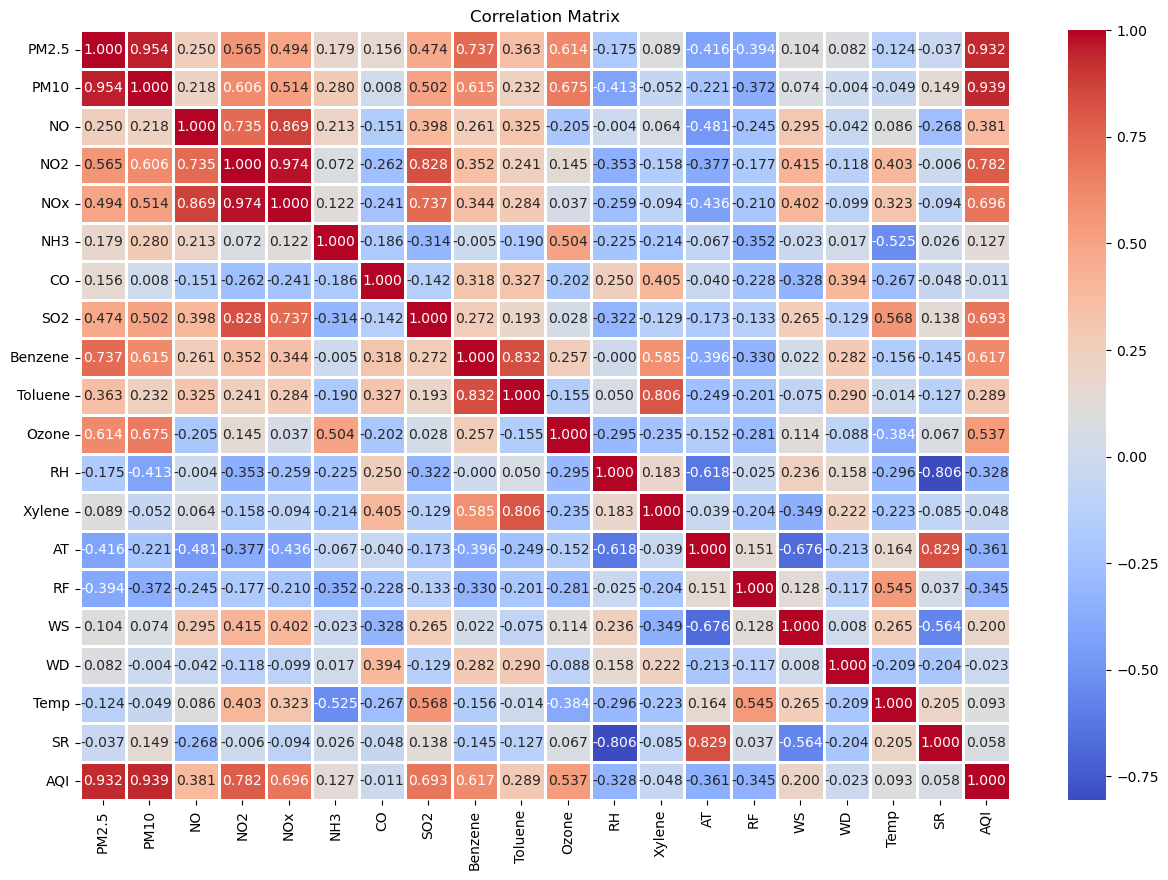

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [19]:
columns_to_transform=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']
data=modified_data_requested
#N3,CO,WD,Temp,SR,Xylene

In [20]:
data_yearly=[]
for i in range(2017,2023):
    data_yearly.append(data[data['From Date'].str[-10:-6]== str(i)])
mean_values_monthly=[]
wanted_columns=columns_to_transform
month=['01','02','03','04','05','06','07','08','09','10','11','12']
for i in range(6):
        nlist=[]
        for j in range(12):
            mlist=[]
            for k in range(20):
                var=data_yearly[i][data_yearly[i]['From Date'].str[-13:-11]==month[j]][wanted_columns[k]].mean()
                if(var>=0):
                    mlist.append(var)
                else:
                    mlist.append(0)
            nlist.append(mlist)    
        mean_values_monthly.append(nlist)

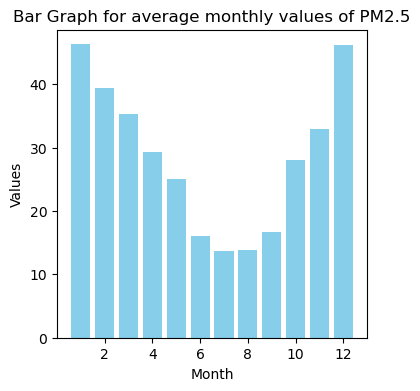

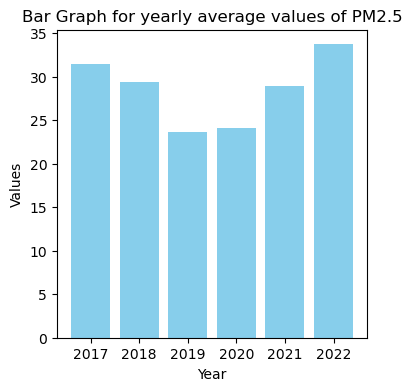

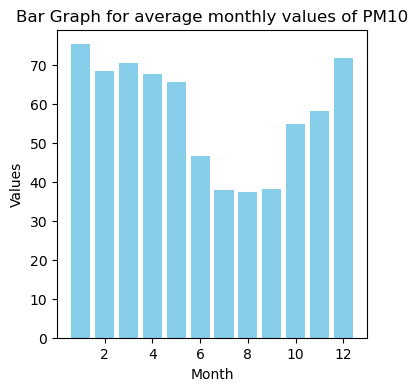

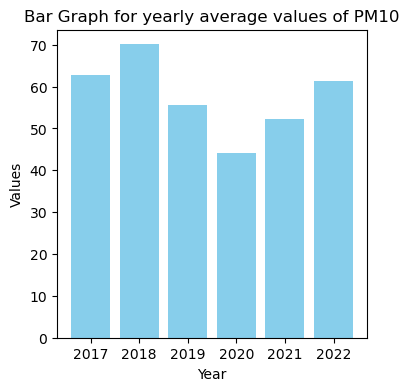

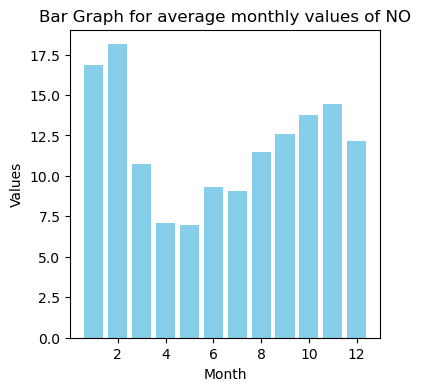

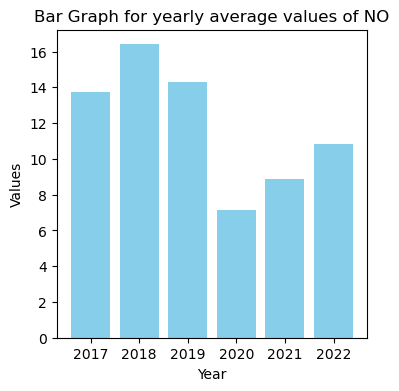

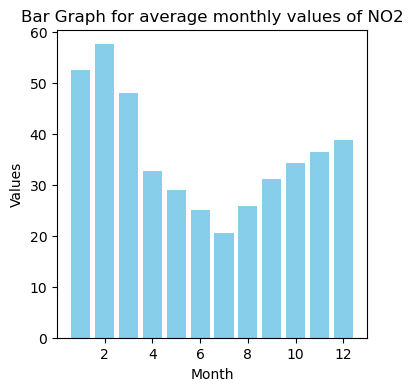

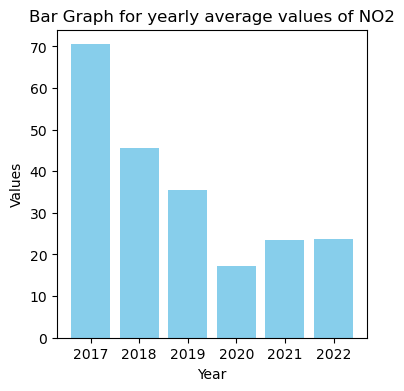

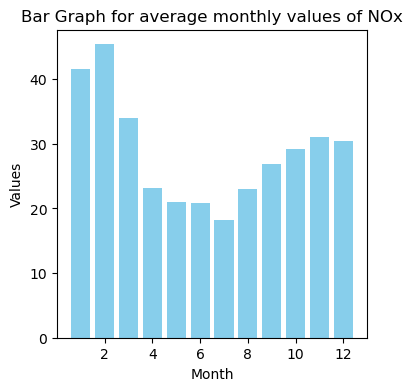

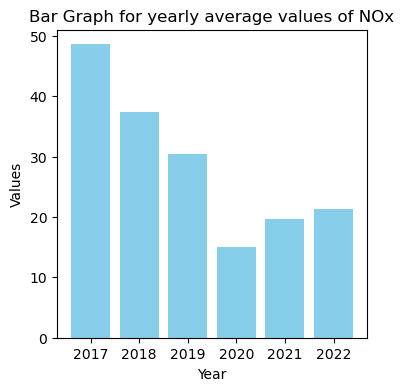

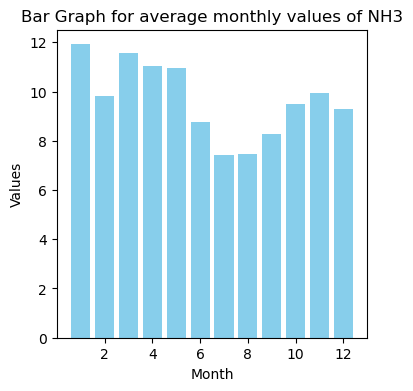

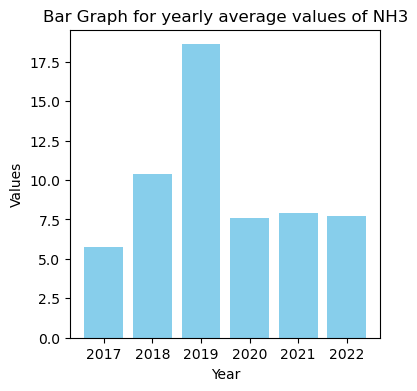

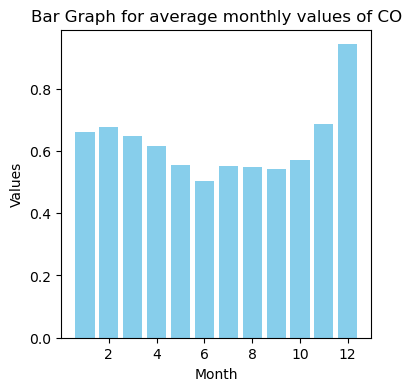

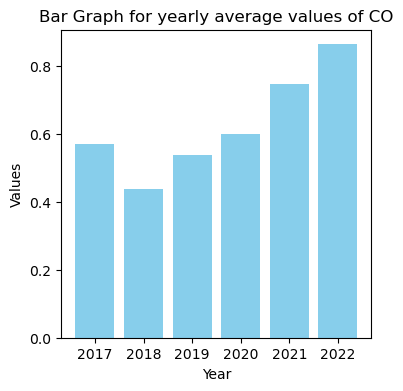

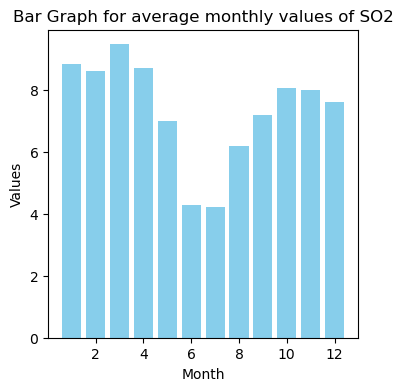

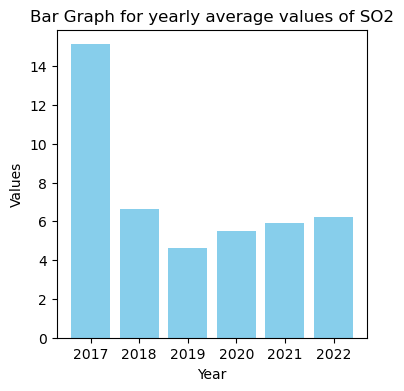

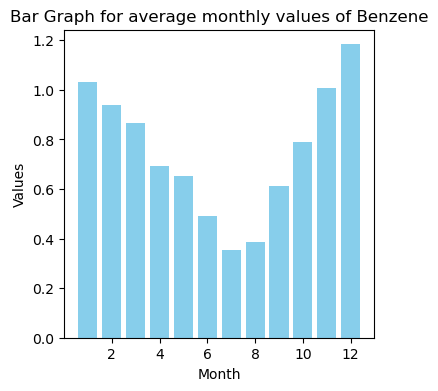

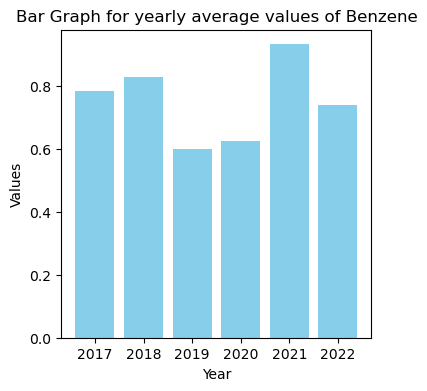

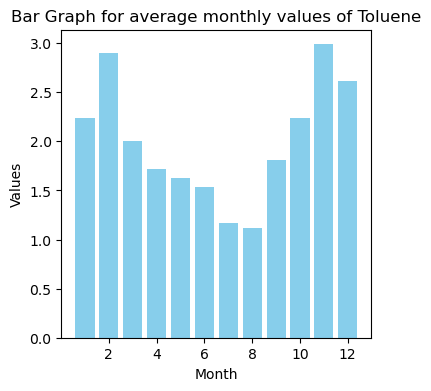

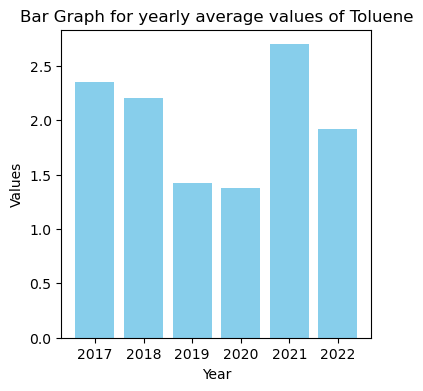

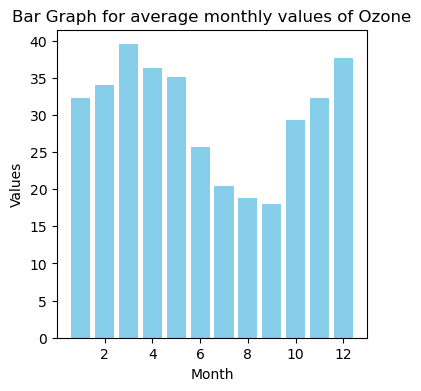

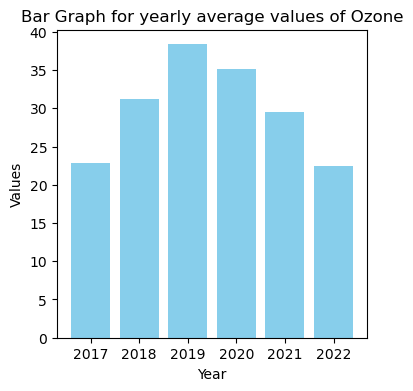

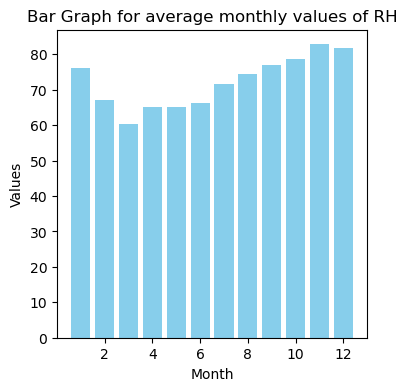

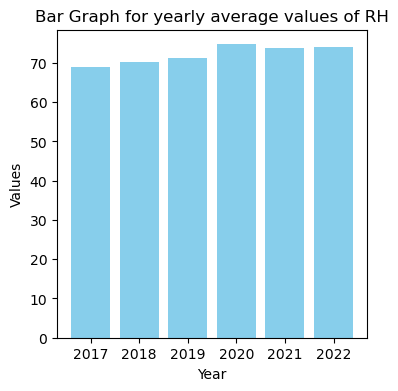

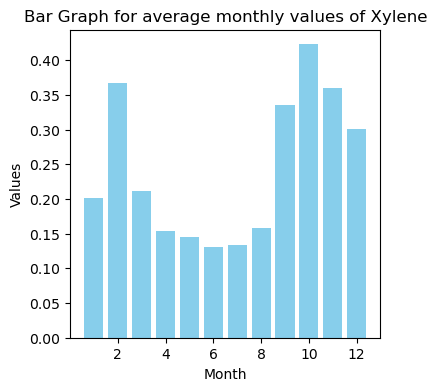

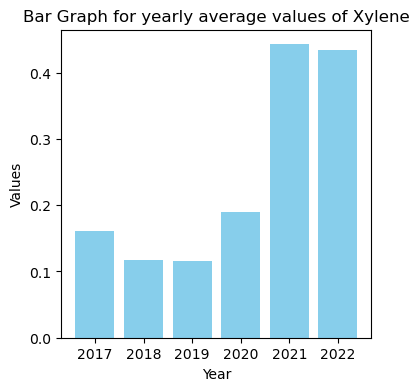

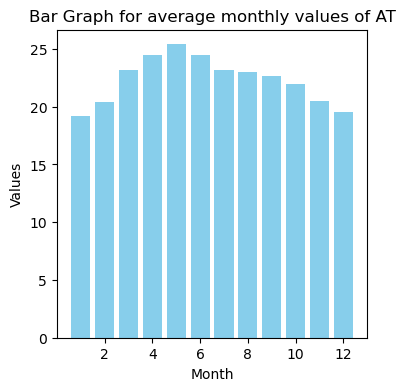

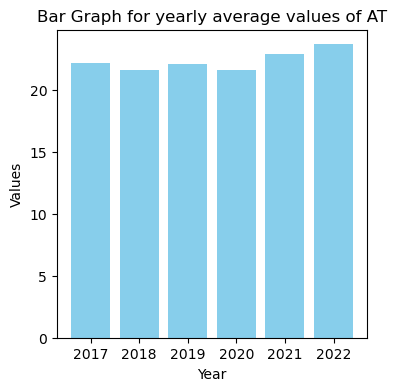

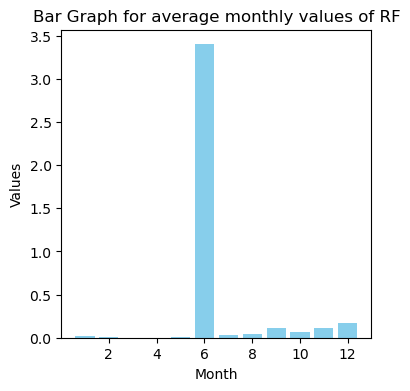

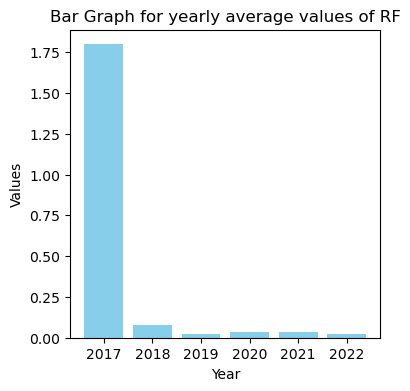

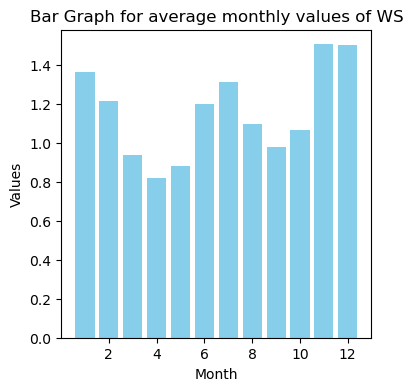

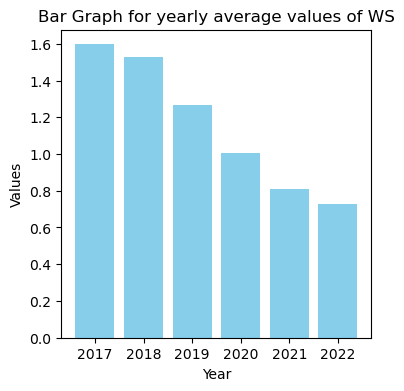

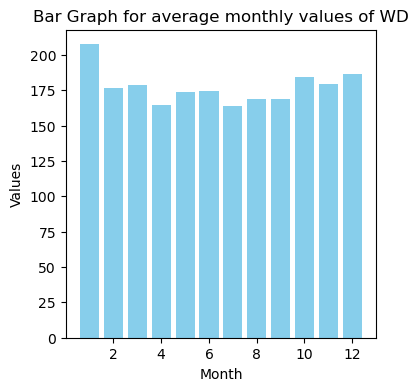

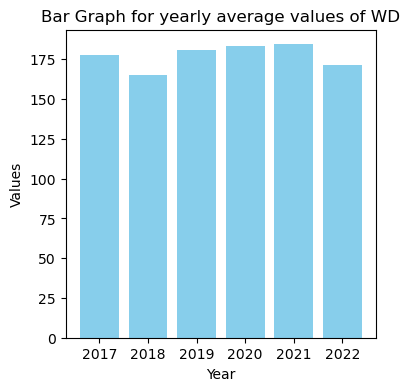

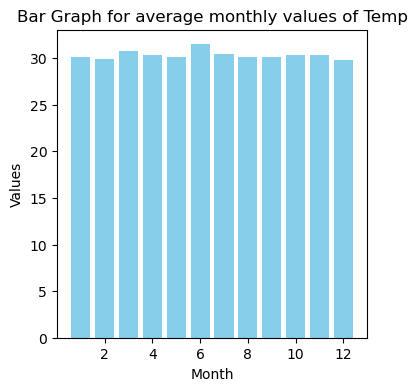

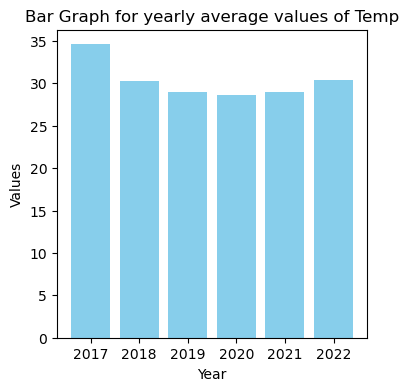

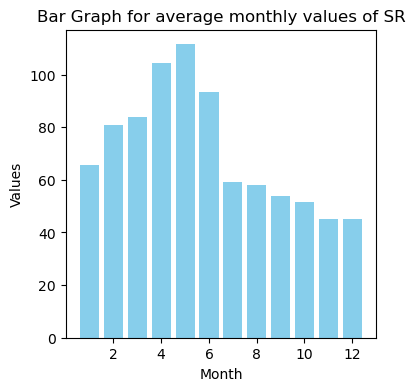

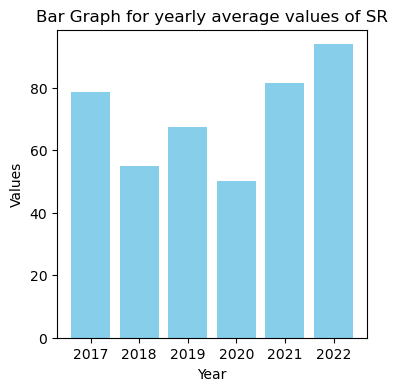

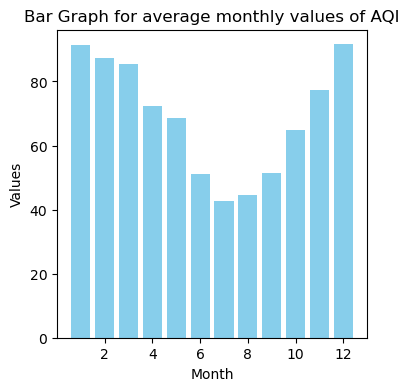

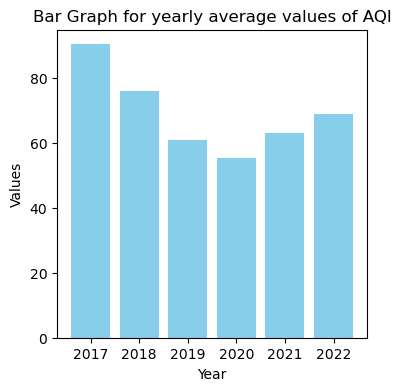

In [21]:
for i in range(20):
    avglist=[]
    for j in range(12):
        list=[]
        for l in range(6):
            list.append(mean_values_monthly[l][j][i])
        avglist.append(sum(list)/len(list))

    indexes = range(1,len(avglist)+1)
    plt.figure(figsize=(4,4))
    plt.bar(indexes, avglist, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.title('Bar Graph for average monthly values of '+wanted_columns[i])
    
    avglist=[]
    for j in range(6):
        list=[]
        for l in range(12):
            list.append(mean_values_monthly[j][l][i])
        avglist.append(sum(list)/len(list))
    plt1.figure(figsize=(4,4))
    indexes = range(2017,len(avglist)+2017)
    plt1.bar(indexes, avglist, color='skyblue')
    plt1.xlabel('Year')
    plt1.ylabel('Values')
    plt1.title('Bar Graph for yearly average values of '+wanted_columns[i])

    plt.show(),plt1.show()

In [22]:
from scipy.stats import skew, kurtosis
list=[]
for i in range(2,22):
    nlist=[]
    nlist.append(data.columns[i])
    raw_skewness = skew(data[data.columns[i]])
    raw_kurtosis = kurtosis(data[data.columns[i]])
    nlist.append(raw_skewness)
    nlist.append(raw_kurtosis)
    list.append(nlist)
print("{0:<10}".format('Metric'),"{0:<10}".format('Skew'),"{0:<10}".format('Kurtosis')+'\n')
for i  in range(len(list)):
    print("{0:<10}".format(list[i][0])+ "{0:>10}".format(str(round(list[i][1],2)))+"{0:>10}".format(str(round(list[i][2],2))))

Metric     Skew       Kurtosis  

PM2.5           1.11      1.07
PM10            0.79       1.4
NO              1.49      2.82
NO2             1.95       8.5
NOx             1.54      4.71
NH3              1.1      0.66
CO              5.52     54.09
SO2              1.9      3.97
Benzene          2.8     18.86
Toluene         3.33     18.72
Ozone           1.13      1.15
RH             -0.64     -0.07
Xylene          6.11     63.22
AT              0.07     -0.36
RF             10.63    114.92
WS              1.07      1.41
WD             -0.07     -0.53
Temp             3.7     21.43
SR              1.57      6.01
AQI             1.48      3.97


In [23]:
data['CO']=data['CO'].replace(to_replace=0,value=0.001)
data['Benzene']=data['Benzene'].replace(to_replace=0,value=0.0001)
data['Toluene']=data['Toluene'].replace(to_replace=0,value=0.0001)
data['Xylene']=data['Xylene'].replace(to_replace=0,value=0.0001)
data['RF']=data['RF'].replace(to_replace=0,value=0.0000000001)

In [27]:
columns_to_skip = ['From Date','To Date']

columns_to_transform=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']


transformed_data = np.log(data[columns_to_transform] + 1e-6)


In [28]:
transformed_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Benzene,Toluene,Ozone,RH,Xylene,AT,RF,WS,WD,Temp,SR,AQI
0,3.790081,4.319353,3.623541,4.648325,4.453998,2.080691,-0.051292,3.046901,0.598837,1.603420,2.830858,4.344584,-0.356674,2.938103,-2.995712,0.524729,5.622102,3.476614,4.670864,4.890349
1,3.219676,3.931237,3.461037,4.600660,4.367040,1.921325,-0.139261,2.979603,0.277632,1.556037,2.825537,4.224495,-0.755020,2.978077,-2.995712,0.392043,5.597199,3.472898,4.896645,4.779124
2,3.604682,4.289500,3.254243,4.634438,4.327834,2.057963,-0.116533,3.051167,0.254643,1.398717,2.763170,4.113330,-0.967581,2.971440,-2.659246,0.500776,5.612690,3.476305,4.760206,4.804021
3,4.008060,4.510420,3.306887,4.683334,4.377893,2.226783,-0.061874,3.070840,0.336473,1.335001,2.827905,4.165579,-0.994250,2.947592,-2.207266,0.398777,5.504844,3.477541,4.757805,4.787492
4,4.152928,4.660416,3.364533,4.708809,4.412556,2.290513,0.019804,3.064325,0.518794,1.467875,2.861629,4.223031,-0.653925,2.951258,-1.897113,0.336473,5.532322,3.483699,4.768988,4.844187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2.831447,3.482777,3.124565,3.690129,3.683867,1.686399,-0.127832,1.391282,0.131029,1.851600,2.634045,4.468548,-0.301104,3.065725,-13.815411,-0.223142,3.906005,3.422959,4.103635,3.828641
2187,3.475996,4.010782,3.494384,3.974622,4.009150,1.560248,-0.162518,2.033398,0.506818,2.399712,3.109507,4.314015,-0.162518,3.107274,-3.911973,-0.733967,4.665701,3.417071,4.559859,4.094345
2188,3.108168,3.730981,3.000720,3.845242,3.718924,1.662031,-0.150822,1.856298,0.239018,1.648659,2.879760,4.306495,-0.174352,3.106826,-13.815411,-0.820978,5.030634,3.413126,4.554824,4.025352
2189,3.572065,4.067316,3.474138,3.996732,4.010601,1.682689,-0.105359,1.635106,0.530629,1.699279,2.954389,4.290870,-0.127832,3.093766,-13.815411,-0.494295,5.018670,3.403861,4.563202,4.204693


In [29]:
list=[]
for i in range(20):
    
        nlist=[]
        trans_skewness = skew(transformed_data[transformed_data.columns[i]])
        trans_kurtosis = kurtosis(transformed_data[transformed_data.columns[i]])
        nlist.append(transformed_data.columns[i])
        nlist.append(trans_skewness)
        nlist.append(trans_kurtosis)
        list.append(nlist)
print("{0:<10}".format('Metric'),"{0:<10}".format('Skew'),"{0:<10}".format('Kurtosis')+'\n')
for i  in range(len(list)):
    print("{0:<10}".format(list[i][0])+ "{0:>10}".format(str(round(list[i][1],2)))+"{0:>10}".format(str(round(list[i][2],2))))

Metric     Skew       Kurtosis  

PM2.5          -0.26      0.05
PM10           -0.36     -0.33
NO             -0.43      0.85
NO2            -0.23      -0.1
NOx            -5.17    103.25
NH3            -1.09      5.68
CO             -4.33     22.34
SO2             0.29       0.3
Benzene        -3.82     19.66
Toluene        -3.64      26.2
Ozone          -0.63       2.2
RH             -1.04      0.95
Xylene         -2.01      3.97
AT             -0.19     -0.42
RF              1.18     -0.38
WS              -0.3     -0.25
WD             -0.97      1.62
Temp            2.64     12.63
SR             -7.54     78.23
AQI             0.24     -0.62


In [35]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains features and 'y' contains labels/targets

X = transformed_data.drop(columns=['AQI'])
y = transformed_data['AQI']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Concatenate X_train and y_train horizontally
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled=np.array(X_train_scaled)

In [39]:
common_dir=r"C:\Users\DELL\Downloads\minipro\Closest"
np.save(fr"{common_dir}\X_train_scaled_closest.npy",X_train_scaled)
np.save(fr"{common_dir}\X_test_scaled_closest.npy",X_test_scaled)
np.save(fr"{common_dir}\X_test_scaled_closest.npy",X_test_scaled)
np.save(fr"{common_dir}\x_train_closest.npy",X_train)
np.save(fr"{common_dir}\x_test_closest.npy",X_test)
np.save(fr"{common_dir}\y_test_closest.npy",Y_test)
np.save(fr"{common_dir}\y_train_closest.npy",Y_train)
np.save(fr"{common_dir}\transformed_data_closest.npy",transformed_data)